<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span></li><li><span><a href="#Лемматизируем-текст." data-toc-modified-id="Лемматизируем-текст.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Лемматизируем текст.</a></span></li><li><span><a href="#Разделим-датасет-на-выборки." data-toc-modified-id="Разделим-датасет-на-выборки.-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделим датасет на выборки.</a></span></li><li><span><a href="#Применим-метод-TF-IDF-к-данным." data-toc-modified-id="Применим-метод-TF-IDF-к-данным.-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Применим метод TF-IDF к данным.</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучим-модель-LogisticRegression." data-toc-modified-id="Обучим-модель-LogisticRegression.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучим модель LogisticRegression.</a></span></li><li><span><a href="#Обучим-модель-DecisionTreeClassifier." data-toc-modified-id="Обучим-модель-DecisionTreeClassifier.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучим модель DecisionTreeClassifier.</a></span></li><li><span><a href="#Обучим-модель-RandomForestClassifier." data-toc-modified-id="Обучим-модель-RandomForestClassifier.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучим модель RandomForestClassifier.</a></span></li><li><span><a href="#Улучшим-показатель-модели-LogisticRegression,-как-лучшей-из-протестированных-нами." data-toc-modified-id="Улучшим-показатель-модели-LogisticRegression,-как-лучшей-из-протестированных-нами.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Улучшим показатель модели LogisticRegression, как лучшей из протестированных нами.</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></li>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка данных.

**Импортируем нужные библиотеки.**

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Импортируем модели из библиотеки sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from tqdm.notebook import tqdm

# Импортируем методы для разбиения на выборки и обработки признаков
from sklearn.model_selection import GridSearchCV

from sklearn.utils import shuffle

import time
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer 

import re 

# Импортируем метрики
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

RANDOM_STATE = 42

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


**Считаем данные из csv-файла в датафрейм и сохраним в переменную.**

In [2]:
try:
    data_0 = pd.read_csv('/datasets/toxic_comments.csv')
except:
    data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')
    print('Таблица /datasets/toxic_comments.csv не была загружена')

**Выведем первые 5 строк датасета data и информацию о нём.**

In [3]:
#Сделаем обзор датасета data_0
display(data_0.shape)
display(data_0.info())
data_0.head()

(159292, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


None

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


**Сделаем выводы по обзору данных:**

 - В исследовани участвует один датасет.
 - В датасете не обнаружено пропусков.
 - В датасете не обнаружено неправильных типов данных.
 - В датасете есть столбец "Unnamed: 0", удалим его в предобработке данных.
 - Названия нужных столбцов приведены к змеиному регистру.

### Предобработка данных.

**Удалим ненужный столбец 'Unnamed: 0'**

In [4]:
data_0 = data_0.drop('Unnamed: 0', axis=1)
data_0.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


**Найдем явные дубликаты.**

In [5]:
#Посчитаем явные дубликаты
print('Количество явных дубликатов data_0:', data_0.duplicated().sum())

Количество явных дубликатов data_0: 0


**Сделаем выводы по предобработке данных.**

 - Явных дубликатов обнаружено не было.
 - Мы удалили ненужный столбец 'Unnamed: 0'.

### Исследовательский анализ данных.

**Посмотрим на распределение значений целевого признака.**

toxic
0    143106
1     16186
Name: toxic, dtype: int64

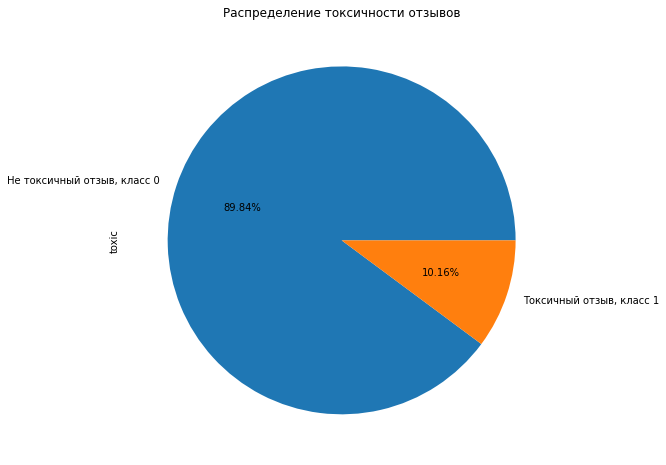

In [6]:
#Проверим распределение показателей и построим график для столбца 'toxic'
display(data_0.groupby('toxic')['toxic'].count())

data_0_toxic = data_0['toxic'].value_counts()

data_0_toxic.plot(kind='pie', autopct='%1.2f%%', figsize=(8, 8), labels=['Не токсичный отзыв, класс 0','Токсичный отзыв, класс 1'])
plt.title('Распределение токсичности отзывов');

**Вывод:** Распределение токсичности отзывов представлено двумя категориями - '0' и '1'. Класс токсичности отзыва: '0' - 89,84%, '1' - 10,16%.

**Вывод:** 
- В датасете не было обнаружено аномальных значений. 
- В датасете мы не обнаружили выбросы в данных.
- В целевом признаке мы обнаружили дисбаланс классов.

### Лемматизируем текст.

**Создадим корпус слов.**

In [7]:
corpus = list(data_0['text'])

In [8]:
lemmatizer = WordNetLemmatizer()

**Напишем функцию для очистки данных.**

In [9]:
def clean_t(text):
    a = re.sub(r"[^'a-zA-Z ]", ' ', text) 
    b = " ".join(a.split())
    return b

In [10]:
def get_wordnet_pos(word):
    m = nltk.pos_tag([word])[0][1][0].upper()
    m_dict = {"J": wordnet.ADJ,
                "V": wordnet.VERB,
                "N": wordnet.NOUN,
                "R": wordnet.ADV}
    
    return m_dict.get(m, wordnet.NOUN)

In [11]:
#Протестируем функцию
print([lemmatizer.lemmatize(i, get_wordnet_pos(i)) for i in nltk.word_tokenize(corpus[2])])

['Hey', 'man', ',', 'I', "'m", 'really', 'not', 'try', 'to', 'edit', 'war', '.', 'It', "'s", 'just', 'that', 'this', 'guy', 'be', 'constantly', 'remove', 'relevant', 'information', 'and', 'talk', 'to', 'me', 'through', 'edits', 'instead', 'of', 'my', 'talk', 'page', '.', 'He', 'seem', 'to', 'care', 'more', 'about', 'the', 'format', 'than', 'the', 'actual', 'info', '.']


**Лематизируем датасет.**

In [12]:
%%time

def lemmat_func(text):
    d = []
    for i in nltk.word_tokenize(text):
        a = lemmatizer.lemmatize(i, get_wordnet_pos(i))
        d.append(a)
    return ' '.join(d)

tqdm.pandas()
data_0['lemmat_text'] = data_0['text'].progress_apply(lemmat_func)

  0%|          | 0/159292 [00:00<?, ?it/s]

CPU times: user 20min 3s, sys: 1min 54s, total: 21min 58s
Wall time: 22min 29s


In [13]:
#Проверим результат работы функции
display(data_0['lemmat_text'][0])

"Explanation Why the edits make under my username Hardcore Metallica Fan be revert ? They be n't vandalism , just closure on some GAs after I vote at New York Dolls FAC . And please do n't remove the template from the talk page since I 'm retire now.89.205.38.27"

### Разделим датасет на выборки.

In [14]:
X = data_0.drop('toxic',axis=1)
y = data_0['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=RANDOM_STATE, 
                                                    stratify=y)

### Применим метод TF-IDF к данным.

In [15]:
#Получим стоп-слова для английского языка
nltk.download('stopwords') 
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
corpus_lemmat_train = X_train['lemmat_text']

In [17]:
corpus_lemmat_test = X_test['lemmat_text']

In [18]:
#Обучим TfidfVectorizer
count_tf_idf = TfidfVectorizer(stop_words=list(stop_words)) 
tf_idf = count_tf_idf.fit(corpus_lemmat_train)

In [19]:
#Получми TF-IDF для корпуса текста
tf_idf = count_tf_idf.transform(corpus_lemmat_train)
tf_idf_test = count_tf_idf.transform(corpus_lemmat_test)

**Вывод:**

 - Мы создали корпус слов, отчистили данные и лемматизировали датасет.
 - Так же мы применили метод TF-IDF к данным.

## Обучение

### Обучим модель LogisticRegression.

In [20]:
%%time

model_lr = LogisticRegression(random_state=RANDOM_STATE, 
                              solver='sag',
                              class_weight='balanced')

param_lr = {'C': range (5, 15),
             'max_iter': range (2,25,2),
            }

grid_lr = GridSearchCV(model_lr, 
                       param_lr, 
                       cv=3,
                       scoring='f1')

grid_lr.fit(tf_idf, y_train)
grid_lr.best_params_

CPU times: user 5min 57s, sys: 0 ns, total: 5min 57s
Wall time: 5min 57s


{'C': 10, 'max_iter': 22}

In [21]:
print('Метрика F1 на модели "LogisticRegression" равна:', grid_lr.best_score_)

Метрика F1 на модели "LogisticRegression" равна: 0.7579924693753499


### Обучим модель DecisionTreeClassifier.

In [22]:
%%time

# Обучим модель DecisionTreeClassifier()
model_dtc = DecisionTreeClassifier(random_state=RANDOM_STATE,
                                      class_weight='balanced')
# Задаём параметры
dtc_param = {'max_depth': range(1, 40, 2)}

dtc_grid = GridSearchCV(model_dtc,
                        dtc_param, 
                        scoring='f1', 
                        cv=3)

dtc_grid.fit(tf_idf, y_train)

CPU times: user 17min 55s, sys: 113 ms, total: 17min 55s
Wall time: 17min 56s


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(1, 40, 2)}, scoring='f1')

In [23]:
print('Метрика F1 на лучшей модели "DecisionTreeClassifier":', dtc_grid.best_score_)

Метрика F1 на лучшей модели "DecisionTreeClassifier": 0.6351996850970942


### Обучим модель RandomForestClassifier.

In [24]:
%%time

# Обучим модель RandomForestClassifier()
model_rfc = RandomForestClassifier(random_state=RANDOM_STATE, 
                                      
                                      class_weight='balanced_subsample')
# Задаём параметрыы
rfc_param = {'n_estimators': range(1, 10, 2)}

rfc_grid = GridSearchCV(model_rfc,
                        rfc_param, 
                        scoring='f1', 
                        cv=3)

rfc_grid.fit(tf_idf, y_train)

CPU times: user 8min 40s, sys: 126 ms, total: 8min 40s
Wall time: 8min 40s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              random_state=42),
             param_grid={'n_estimators': range(1, 10, 2)}, scoring='f1')

In [25]:
print('Метрика F1 на лучшей модели "RandomForestClassifier":', rfc_grid.best_score_)

Метрика F1 на лучшей модели "RandomForestClassifier": 0.5949735145122833


**Вывод:** Наилучший результат на метрике F1 показала модель - LogisticRegression, с параметрами: {'C': 10, 'max_iter': 22}. Она показала качество F1 - 0.75799, что выше до нужного нам показателя в 0.75. Еще улучшим её результат подобрав порог классификации.

**Измерим метрику F1 лучшей модели на тестовой выборке.**

In [26]:
pred_lr= grid_lr.predict(tf_idf_test)

f1_lr = f1_score(y_test, pred_lr)
print('Метрика F1 модели "LogisticRegression" на тестовой выборке равна:', f1_lr)

Метрика F1 модели "LogisticRegression" на тестовой выборке равна: 0.7560050568900126


### Улучшим показатель модели LogisticRegression, как лучшей из протестированных нами.

In [27]:
#Переберём значения F1, precision, recall в цикле и выберем порог классификации
proba = grid_lr.predict_proba(tf_idf_test)
proba = proba[:, 1]

for threshold in np.arange(0.2, 1, 0.02):
    pred = proba > threshold
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred)
    
    print(f'Порог = {threshold:.2f}, Precision = {precision:.3f}, Recall = {recall:.3f}, F1 = {f1:.5f}')

Порог = 0.20, Precision = 0.520, Recall = 0.890, F1 = 0.65634
Порог = 0.22, Precision = 0.539, Recall = 0.883, F1 = 0.66960
Порог = 0.24, Precision = 0.556, Recall = 0.875, F1 = 0.68005
Порог = 0.26, Precision = 0.571, Recall = 0.869, F1 = 0.68881
Порог = 0.28, Precision = 0.586, Recall = 0.865, F1 = 0.69834
Порог = 0.30, Precision = 0.601, Recall = 0.861, F1 = 0.70772
Порог = 0.32, Precision = 0.612, Recall = 0.856, F1 = 0.71356
Порог = 0.34, Precision = 0.624, Recall = 0.853, F1 = 0.72055
Порог = 0.36, Precision = 0.636, Recall = 0.846, F1 = 0.72635
Порог = 0.38, Precision = 0.649, Recall = 0.843, F1 = 0.73371
Порог = 0.40, Precision = 0.659, Recall = 0.838, F1 = 0.73786
Порог = 0.42, Precision = 0.669, Recall = 0.833, F1 = 0.74240
Порог = 0.44, Precision = 0.682, Recall = 0.829, F1 = 0.74827
Порог = 0.46, Precision = 0.690, Recall = 0.823, F1 = 0.75054
Порог = 0.48, Precision = 0.698, Recall = 0.819, F1 = 0.75373
Порог = 0.50, Precision = 0.707, Recall = 0.813, F1 = 0.75601
Порог = 

**Выберем пороговое значение, равное 0.74, как наиболее подходящее для метрики F1.**

In [28]:
pred_test = (grid_lr.predict_proba(tf_idf_test)[:,1] > 0.74)
f1_lr = f1_score(y_test, pred_test)

print('Метрика качества F1 с порогом классификации 0.74 для модели LogisticRegression:', f1_lr)

Метрика качества F1 с порогом классификации 0.74 для модели LogisticRegression: 0.7774189381216896


**Выведем значения метрики F1 всех протестированных нами моделей.**

In [29]:
res = {'Модель                ':'F1',
       'DecisionTreeClassifier': dtc_grid.best_score_,
       'RandomForestClassifier': rfc_grid.best_score_,
       'LogisticRegression    ': f1_lr}
res

{'Модель                ': 'F1',
 'DecisionTreeClassifier': 0.6351996850970942,
 'RandomForestClassifier': 0.5949735145122833,
 'LogisticRegression    ': 0.7774189381216896}

**Вывод:** Модель LogisticRegression показала наилучший результат и с помощью подбора порога классификации - 0.74 смогла превысить значение 0.75. 

## Выводы

### Общий вывод.

**Сделаем общий вывод по проделанному исследованию.**

Мы исследовали датасет интернет-магазина «Викишоп». Компании нужно было построить модель, которая будет искать "токсичные" комментарии, для дальнейшей отправки на модерацию. Критерием качества этой модели было значение метрики F1 не меньше 0.75.

**Сделаем выводы по обзору данных:**

 - В исследовани участвует один датасет.
 - В датасете не обнаружено пропусков.
 - В датасете не обнаружено неправильных типов данных.
 - В датасете есть столбец "Unnamed: 0", удалим его в предобработке данных.
 - Названия нужных столбцов приведены к змеиному регистру.

**Сделаем выводы по предобработке данных.**

 - Явных дубликатов обнаружено не было.
 - Мы удалили ненужный столбец 'Unnamed: 0'.
 
**Сделаем вывод по исследовательскому анализу данных:**

- В датасете не было обнаружено аномальных значений. 
- В датасете мы не обнаружили выбросы в данных.
- В целевом признаке мы обнаружили дисбаланс классов.
- Распределение токсичности отзывов представлено двумя категориями - '0' и '1'. Класс токсичности отзыва: '0' - 89,84%, '1' - 10,16%.

**Сделаем вывод по подготовке данных к моделированию:**

 - Мы создали корпус слов, отчистили данные и лемматизировали датасет.
 - Так же мы применили метод TF-IDF к данным.
 
**Сделаем вывод по обучению моделей:**

Наилучший результат на метрике F1 показала модель - LogisticRegression, с параметрами: {'C': 10, 'max_iter': 22}. Она показала качество F1 - 0.75799, что выше до нужного нам показателя в 0.75. Еще улучшим её результат подобрав порог классификации.

**Сделаем вывод по доработке модели:**

Модель LogisticRegression показала наилучший результат и с помощью подбора порога классификации - 0.74 смогла превысить значение 0.75, что и требовалось от исследования.